Import all Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read csv file and store in df

In [ ]:
df = pd.read_csv("kidney_dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Creatinine        5000 non-null   float64
 1   BUN               5000 non-null   float64
 2   GFR               5000 non-null   float64
 3   Urine_Output      5000 non-null   float64
 4   Diabetes          5000 non-null   int64  
 5   Hypertension      5000 non-null   int64  
 6   Age               5000 non-null   float64
 7   Protein_in_Urine  5000 non-null   float64
 8   Water_Intake      5000 non-null   float64
 9   Medication        2013 non-null   object 
 10  CKD_Status        5000 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 429.8+ KB


In [ ]:
df.head()

,Creatinine,BUN,GFR,Urine_Output,Diabetes,Hypertension,Age,Protein_in_Urine,Water_Intake,Medication,CKD_Status
0,0.788803,8.386869,102.161787,1632.649387,0,0,27.682074,106.700203,1.570370,NaN,0
1,3.413970,53.688796,50.071257,935.540516,1,0,33.122208,410.008362,3.425287,ACE Inhibitor,1
2,0.647645,7.466540,89.451831,1774.553846,1,1,55.832284,123.336925,1.123301,Diuretic,0
3,0.795508,12.516821,99.872180,2360.602980,0,0,32.391900,116.098870,3.086846,ACE Inhibitor,0
4,0.869010,19.855960,86.110182,1987.750901,0,1,66.689515,55.668760,2.174980,ARB,0


Null values percentage for each column

In [ ]:
df.isna().sum() / len(df) * 100

,0
Creatinine,0.00
BUN,0.00
GFR,0.00
Urine_Output,0.00
Diabetes,0.00
Hypertension,0.00
Age,0.00
Protein_in_Urine,0.00
Water_Intake,0.00
Medication,59.74


Remove Unwanted columns and columns which have null values percentage greater than 20 percentage

In [ ]:
df.drop(columns = ["Medication"],inplace = True)

In [ ]:
df.drop(columns = ["CKD_Status"],inplace = True)

In [ ]:
def check_outliers(df):
  for col in df.columns:
    if df[col].dtype != "object":
      sns.boxplot(df[col])
      plt.show()

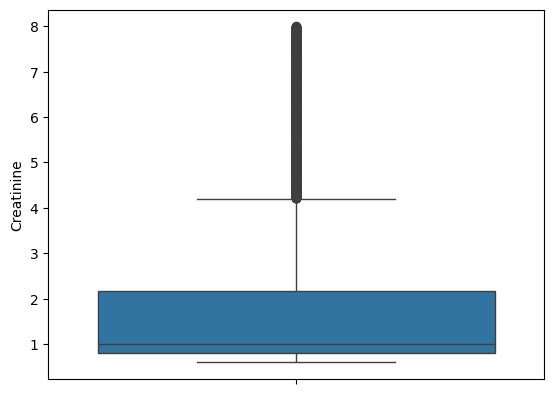

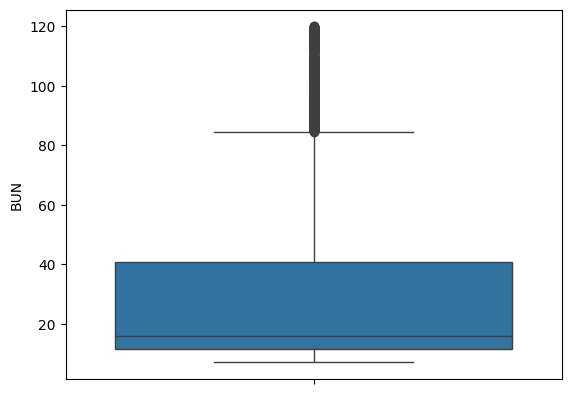

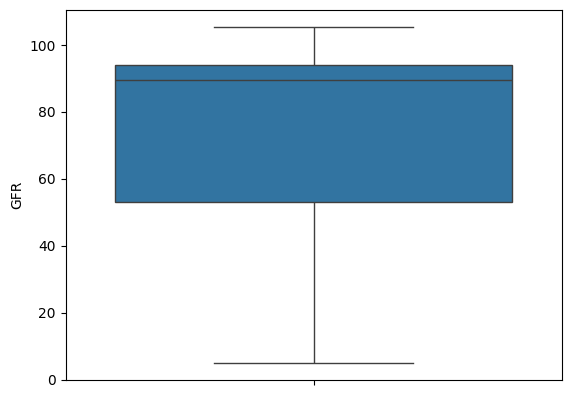

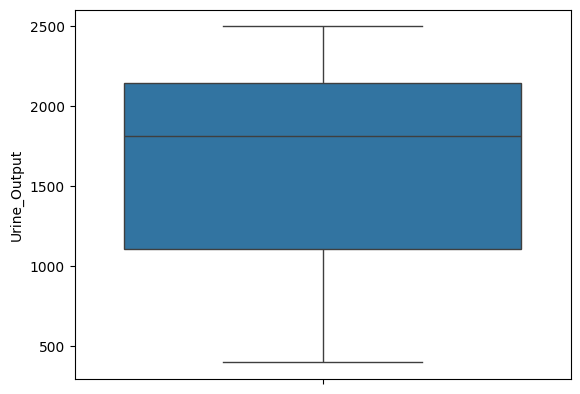

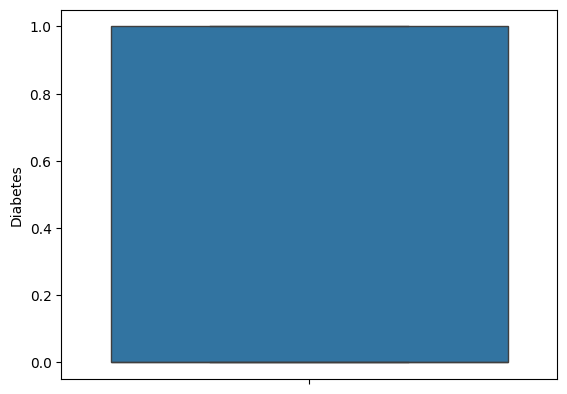

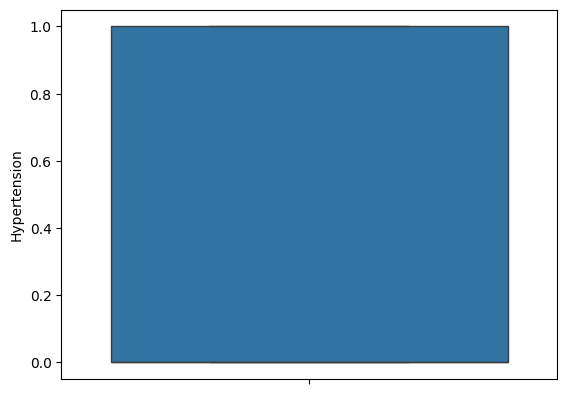

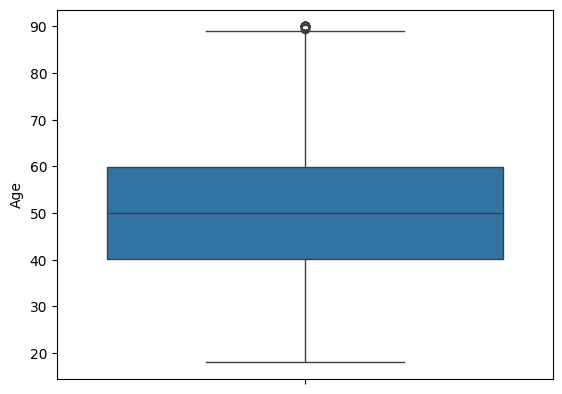

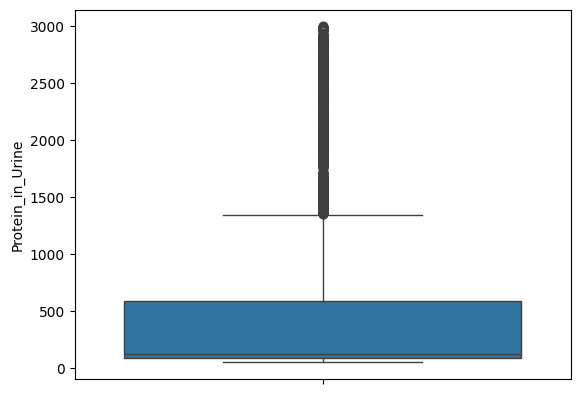

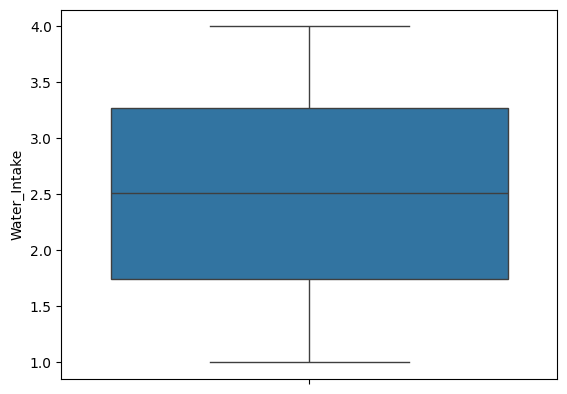

In [ ]:
check_outliers(df)

To know which columns have outliers

In [ ]:
def check_distribution(df):
  for col in df.columns:
    if df[col].dtype != "object":
      sns.kdeplot(df[col])
      plt.show()

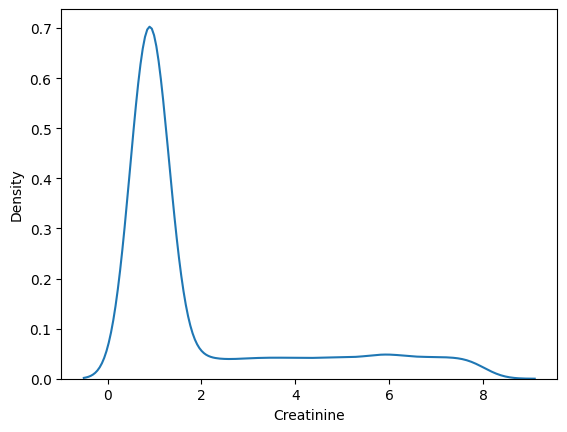

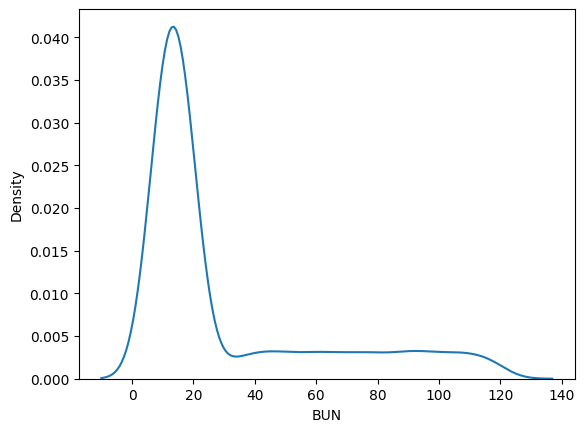

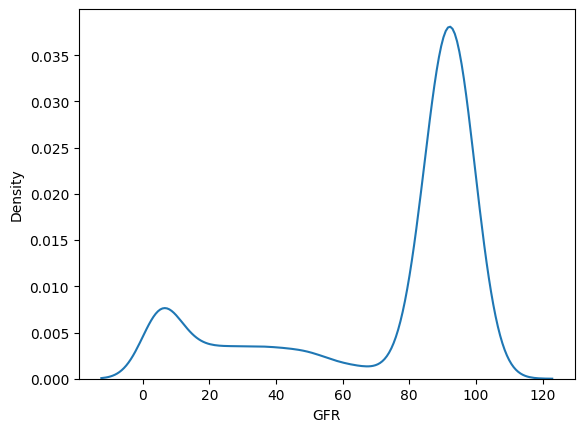

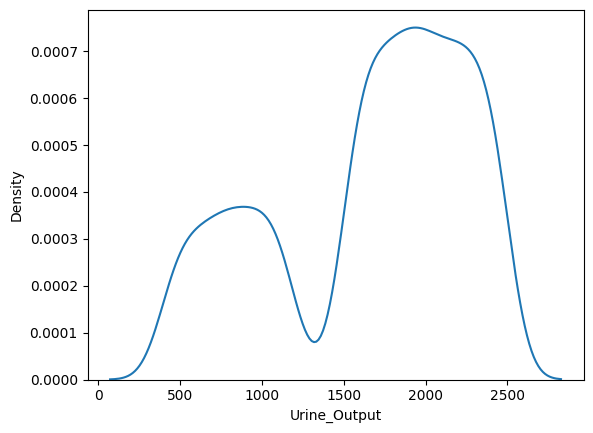

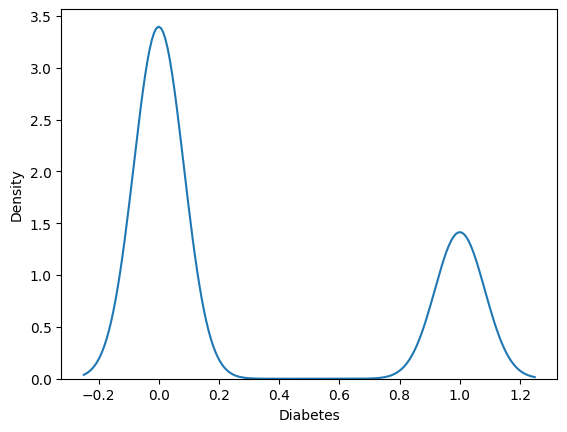

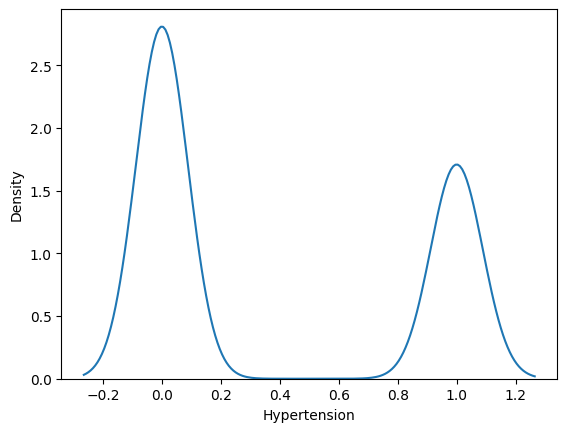

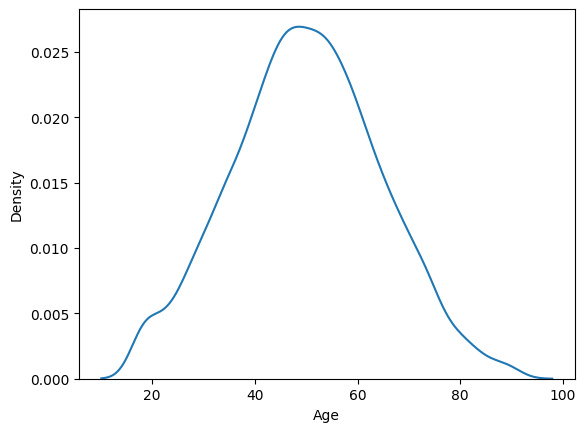

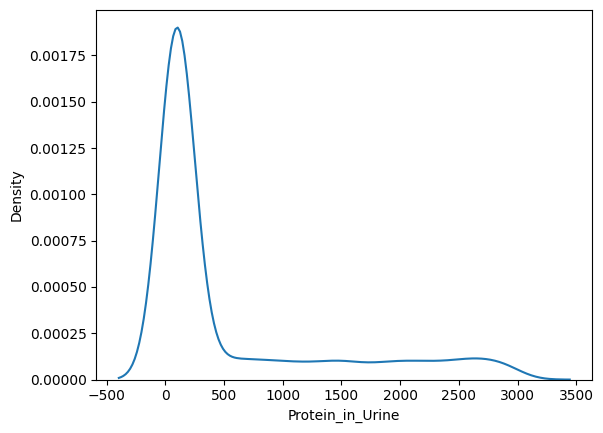

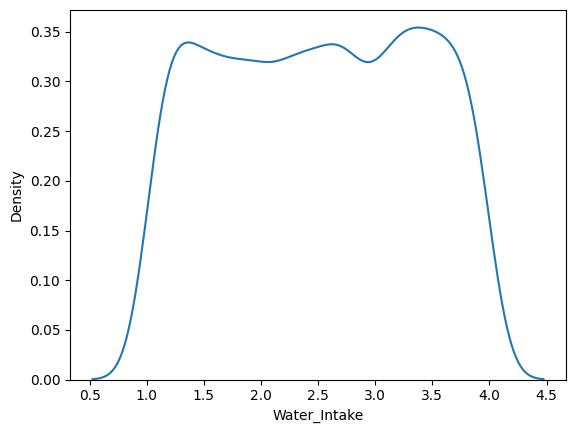

In [ ]:
check_distribution(df)

Assign columns which are predictors to X and target to y

In [ ]:
y = df["GFR"]
X = df.drop(columns = ["GFR"])

In [ ]:
print(y.head())
print(X.head())
print(y.shape)
print(X.shape)

0    102.161787
1     50.071257
2     89.451831
3     99.872180
4     86.110182
Name: GFR, dtype: float64
   Creatinine        BUN  Urine_Output  Diabetes  Hypertension        Age  \
0    0.788803   8.386869   1632.649387         0             0  27.682074   
1    3.413970  53.688796    935.540516         1             0  33.122208   
2    0.647645   7.466540   1774.553846         1             1  55.832284   
3    0.795508  12.516821   2360.602980         0             0  32.391900   
4    0.869010  19.855960   1987.750901         0             1  66.689515   

   Protein_in_Urine  Water_Intake  
0        106.700203      1.570370  
1        410.008362      3.425287  
2        123.336925      1.123301  
3        116.098870      3.086846  
4         55.668760      2.174980  
(5000,)
(5000, 8)


Split the data for train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 8)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_train.head())

(4000, 8)
(1000, 8)
      Creatinine         BUN  Urine_Output  Diabetes  Hypertension        Age  \
4681    4.890030   97.157036    640.019734         0             0  44.130502   
504     4.544829  104.213518    956.699759         0             0  70.285438   
4113    2.081754   54.513069    592.439320         0             0  62.701567   
162     0.625922   13.737314   1538.974486         0             0  27.454297   
2632    0.720619    8.731628   1941.279091         0             0  43.478080   

      Protein_in_Urine  Water_Intake  
4681       1163.692114      3.596852  
504         422.108291      1.986001  
4113       1448.579605      1.635077  
162          79.211341      2.876394  
2632        136.807439      1.472098  


Apply feature Scaling techniques to the data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers = [("t1",StandardScaler(),[0,1,2,5,6,7])],remainder = "passthrough")
X_train_trans = transformer.fit_transform(X_train)
X_test_trans = transformer.transform(X_test)

In [ ]:
X_train_trans = pd.DataFrame(X_train_trans,columns = X_train.columns)
X_test_trans = pd.DataFrame(X_test_trans,columns = X_test.columns)

In [ ]:
X_train_trans.head()

,Creatinine,BUN,Urine_Output,Diabetes,Hypertension,Age,Protein_in_Urine,Water_Intake
0,1.419943,2.113444,-1.705484,-0.405175,0.756747,1.252122,0.0,0.0
1,1.250208,2.338852,-1.176894,1.402489,-0.146349,-0.596986,0.0,0.0
2,0.039121,0.751247,-1.784904,0.878340,1.103682,-0.999815,0.0,0.0
3,-0.676708,-0.551272,-0.204984,-1.557730,-0.563927,0.425103,0.0,0.0
4,-0.630146,-0.711171,0.466527,-0.450267,-0.493787,-1.186899,0.0,0.0


In [ ]:
X_test_trans.head()

,Creatinine,BUN,Urine_Output,Diabetes,Hypertension,Age,Protein_in_Urine,Water_Intake
0,-0.521420,-0.738473,1.000123,-1.155665,-0.543898,-1.239016,1.0,1.0
1,-0.444236,-0.408643,1.204097,0.312787,-0.560219,1.093665,0.0,0.0
2,-0.555172,-0.601442,0.418622,-0.650087,-0.555640,0.805609,1.0,1.0
3,2.794294,0.845301,-1.394171,0.520810,2.414836,0.223301,0.0,1.0
4,-0.246574,1.240726,-1.990034,-0.890151,0.082265,0.687305,1.0,0.0


GridSearchCV

Apply Grid search cv to know the hyper parameters which parameters give best result



In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

tuned_parameters = [{"n_neighbors":[i for i in range(1,51)],"p":[1,2,3]}]
Rgr = GridSearchCV(
    estimator = KNeighborsRegressor(),
    param_grid = tuned_parameters,
    scoring = "r2",
    cv = 5,
    return_train_score = True,
    verbose = 1 #optional
)
Rgr.fit(X_train_trans,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'p': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
print("Best parameters on the train set")
print(Rgr.best_params_)
print(Rgr.best_estimator_)
print("Score:",Rgr.score(X_test_trans,y_test))

Best parameters on the train set
{'n_neighbors': 9, 'p': 1}
KNeighborsRegressor(n_neighbors=9, p=1)
Score: 0.9918513349740231


Build model by using the parameters which give best model

In [ ]:
#Build Model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
model = KNeighborsRegressor(n_neighbors = 9,p =1)
model.fit(X_train_trans,y_train)

KNeighborsRegressor(n_neighbors=9, p=1)

validation"

In [ ]:
y_pred = model.predict(X_test_trans)
score = r2_score(y_pred,y_test)
print(score)

0.9917046948932583


RandomizedSearchCV

Apply Random search cv to know the hyper parameters which parameters give best result


In [ ]:
tuned_parameters = [{"n_neighbors":[i for i in range(1,51)],"p":[1,2,3]}]
Rgr = RandomizedSearchCV(
    estimator = KNeighborsRegressor(),
    param_distributions = tuned_parameters,
    scoring = "r2",
    cv = 5,
    return_train_score = True,
    verbose = 1 #optional
)
Rgr.fit(X_train_trans,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                         'p': [1, 2, 3]}],
                   return_train_score=True, scoring='r2', verbose=1)

In [ ]:
print("Best parameters on train set")
print(Rgr.best_params_)
print(Rgr.best_estimator_)
print("Score :",Rgr.score(X_test_trans,y_test))

Best parameters on train set
{'p': 1, 'n_neighbors': 12}
KNeighborsRegressor(n_neighbors=12, p=1)
Score : 0.9914096013876101


In [ ]:
#Build model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
model = KNeighborsRegressor(n_neighbors = 9, p= 1)
model.fit(X_train_trans,y_train)

KNeighborsRegressor(n_neighbors=9, p=1)

In [ ]:
#validation
y_pred = model.predict(X_test_trans)
score = r2_score(y_pred,y_test)
print("score :",score)

score : 0.9917046948932583


Decision Tree Algorithm

Apply Grid search cv to know the hyper parameters which parameters give best result


In [ ]:
tuned_parameters = [{"max_depth":[i for i in range(1,51)]}]
DTR = GridSearchCV(
    estimator = DecisionTreeRegressor(),
    param_grid = tuned_parameters,
    scoring = "r2",
    cv =5,
    return_train_score = True,
    verbose = 1
)
DTR.fit(X_train_trans,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
print("Best parameters on train set")
print(DTR.best_params_)
print(DTR.best_estimator_)
print("score:",DTR.score(X_train_trans,y_train))

Best parameters on train set
{'max_depth': 25}
DecisionTreeRegressor(max_depth=25)
score: 1.0


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth = 25)
model.fit(X_train_trans,y_train)

DecisionTreeRegressor(max_depth=25)

validation

In [ ]:
y_pred = model.predict(X_test_trans)
score = r2_score(y_pred,y_test)
print(score)

0.9938937804127053


RandomizedSearchCV

Apply Random search cv to know the hyper parameters which parameters give best result


In [ ]:
tuned_parameters = [{"max_depth":[i for i in range(1,51)]}]
DTR = RandomizedSearchCV(
    estimator = DecisionTreeRegressor(),
    param_distributions = tuned_parameters,
    scoring = "r2",
    cv = 5,
    return_train_score = True,
    verbose = 1
)
DTR.fit(X_train_trans,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                       9, 10, 11, 12, 13, 14,
                                                       15, 16, 17, 18, 19, 20,
                                                       21, 22, 23, 24, 25, 26,
                                                       27, 28, 29, 30, ...]}],
                   return_train_score=True, scoring='r2', verbose=1)

In [ ]:
print("Best parameters on train set")
print(DTR.best_params_)
print(DTR.best_estimator_)
print("score:",DTR.score(X_train_trans,y_train))

Best parameters on train set
{'max_depth': 39}
DecisionTreeRegressor(max_depth=39)
score: 1.0


Building model by using hyper parameters

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth = 39)
model.fit(X_train_trans,y_train)

DecisionTreeRegressor(max_depth=39)

Validation

In [ ]:
y_pred = model.predict(X_test_trans)
score = r2_score(y_pred,y_test)
print(score)

0.9939752626075857
